In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
file = 'data/raw/FC2018_protein_quant.xls'

In [53]:
gastric_df = pd.read_excel(file)

In [54]:
# use first row as heading 
new_header = gastric_df.iloc[0]
# remove first row from dataframe
gastric_df = gastric_df[1:]
# assign as column names
gastric_df.columns = new_header
# print(new_header.tolist())

In [55]:
# manually determine which columns irrelevant, indices to remove
to_del = [0, 1] + list(range(3, 10)) + list(range(34, 109))
# remove raw, un-logged values "Corr"
to_del = to_del + list(range(10,22))

gastric_df = gastric_df.drop([gastric_df.columns[x] for x in to_del],  axis='columns')
gastric_df.columns

Index(['Gene', 'NC1 Log2', 'NC2 Log2', 'NC3 Log2', 'NC4 Log2', 'GC1 Log2',
       'GC2 Log2', 'GC3 Log2', 'GC4 Log2', 'PL1 Log2', 'PL2 Log2', 'PL3 Log2',
       'PL4 Log2', 'Pattern', 'Ribosome', 'Spliceosome',
       'Valine, leucine and isoleucine degradation',
       'Oxidative phosphorylation', 'Proteasome',
       'Protein processing in endoplasmic reticulum',
       'Glycolysis / Gluconeogenesis', 'Citrate cycle (TCA cycle)',
       'Endocytosis', 'Fatty acid degradation', 'Fatty acid metabolism',
       'RNA transport', 'Pyruvate metabolism',
       'Fructose and mannose metabolism', 'Regulation of actin cytoskeleton',
       'Phagosome', 'Complement and coagulation cascades',
       'Arginine and proline metabolism', 'DNA Replication',
       'PPAR signaling pathway', 'ECM-receptor interaction', 'Focal adhesion',
       'Pentose phosphate pathway', 'RNA degradation', 'Mismatch repair',
       'Stomach specific', 'Mitochondrion', 'Cytoplasm',
       'Extracellular exosome', 'Mem

In [56]:
# convert X, NaN to 1, 0
gastric_df = gastric_df.fillna(0)
gastric_df = gastric_df.replace(['X'],1)
gene_list = gastric_df.Gene
gastric_df = gastric_df.drop(['Gene'],  axis='columns')

gastric_df.to_csv('data/processed/clean_gastric.csv')
gastric_df

,NC1 Log2,NC2 Log2,NC3 Log2,NC4 Log2,GC1 Log2,GC2 Log2,GC3 Log2,GC4 Log2,PL1 Log2,PL2 Log2,...,RNA degradation,Mismatch repair,Stomach specific,Mitochondrion,Cytoplasm,Extracellular exosome,Membrane,Nucleus,Endoplasmic reticulum,Golgi apparatus
1,14.141872,14.107314,13.862564,13.757528,14.283957,13.844870,14.446062,14.238953,14.157263,13.412358,...,0,0,0,1,1,1,1,1,0,0
2,18.189801,18.202496,18.049074,18.069828,18.372977,18.240611,18.414903,18.385577,18.464838,18.382029,...,0,0,0,0,1,1,0,1,0,0
3,15.370743,15.220339,14.877490,14.877915,15.250045,15.182754,15.617631,15.404629,15.313874,14.679077,...,0,0,0,0,0,1,0,0,0,0
4,20.695419,20.764910,20.609847,20.648786,20.419828,20.184950,20.393157,20.341481,20.694539,20.345622,...,0,0,0,0,1,0,0,1,0,0
5,19.076272,19.118719,19.159973,19.142240,18.936441,18.792552,18.894393,18.742887,18.848415,18.776311,...,0,0,0,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3910,12.901462,13.211006,13.401413,13.283953,13.499713,13.480609,13.207380,13.471890,13.221693,13.314391,...,0,0,0,0,1,0,0,1,0,0
3911,14.153375,14.074614,14.294366,14.275029,14.141097,14.475560,14.173025,14.205150,14.154766,14.456927,...,0,0,0,0,0,0,0,0,0,0
3912,14.537214,14.515092,14.198650,14.548186,13.307382,13.813228,13.612146,13.882917,14.146743,14.460718,...,0,0,0,0,1,0,0,1,0,0
3913,13.652200,13.503825,12.866414,13.433816,13.270009,12.735903,13.123058,13.411304,13.479893,12.886742,...,0,0,0,0,0,0,0,1,0,0


In [58]:
# transpose, convert to patient sample per row
patient_gastric_df = gastric_df.T

# remove non-data rows
to_del = [0] + list(range(13,46))
patient_gastric_df = patient_gastric_df.drop(patient_gastric_df.index[to_del])

patient_gastric_df.to_csv('data/processed/patient_gastric.csv')
patient_gastric_df

,1,2,3,4,5,6,7,8,9,10,...,3905,3906,3907,3908,3909,3910,3911,3912,3913,3914
0,,,,,,,,,,,,,,,,,,,,,
NC2 Log2,14.107314,18.202496,15.220339,20.764910,19.118719,17.200443,17.776666,16.313253,14.209927,14.697544,...,20.026804,17.862611,17.746054,11.264267,18.218309,13.211006,14.074614,14.515092,13.503825,16.393447
NC3 Log2,13.862564,18.049074,14.877490,20.609847,19.159973,17.497630,17.692788,16.479957,13.840476,14.573115,...,20.047174,17.761044,17.755131,12.500099,18.095022,13.401413,14.294366,14.198650,12.866414,16.436029
NC4 Log2,13.757528,18.069828,14.877915,20.648786,19.142240,17.435956,17.636674,16.473456,13.860506,14.771464,...,20.020296,17.752938,17.723194,12.528126,18.152042,13.283953,14.275029,14.548186,13.433816,16.495736
GC1 Log2,14.283957,18.372977,15.250045,20.419828,18.936441,17.223402,18.612105,16.191802,13.787683,14.437127,...,20.151233,17.429235,17.678690,10.795212,17.867372,13.499713,14.141097,13.307382,13.270009,16.188035
GC2 Log2,13.844870,18.240611,15.182754,20.184950,18.792552,17.594148,18.522054,16.548121,13.717444,14.746656,...,20.210639,17.273450,17.691193,13.195557,17.831019,13.480609,14.475560,13.813228,12.735903,16.363108
GC3 Log2,14.446062,18.414903,15.617631,20.393157,18.894393,17.303590,18.659673,16.374249,13.903670,14.534994,...,20.235168,17.380210,17.793484,12.078803,17.950243,13.207380,14.173025,13.612146,13.123058,16.356790
GC4 Log2,14.238953,18.385577,15.404629,20.341481,18.742887,17.186565,18.633122,16.189146,13.915617,14.693789,...,20.143621,17.369401,17.713564,12.378260,17.727023,13.471890,14.205150,13.882917,13.411304,16.357408
PL1 Log2,14.157263,18.464838,15.313874,20.694539,18.848415,17.193123,18.207764,16.251555,13.941616,14.651519,...,20.374420,17.941426,17.880060,11.470290,18.051019,13.221693,14.154766,14.146743,13.479893,16.437476
PL2 Log2,13.412358,18.382029,14.679077,20.345622,18.776311,17.732135,18.133969,16.610072,13.794923,15.039762,...,20.509983,17.718124,17.723361,13.456666,17.954646,13.314391,14.456927,14.460718,12.886742,16.629294


In [59]:
# create averages among samples for preliminary plotting 
col = gastric_df.loc[:, "NC1 Log2":"NC4 Log2"]
gastric_df['avg_NC_log2'] = col.mean(axis=1)

col = gastric_df.loc[:, "GC1 Log2":"GC4 Log2"]
gastric_df['avg_GC_log2'] = col.mean(axis=1)

col = gastric_df.loc[:, "PL1 Log2":"PL4 Log2"]
gastric_df['avg_PL_log2'] = col.mean(axis=1)

avg_gastric_df = gastric_df.drop([gastric_df.columns[x] for x in list(range(0,13))],  axis='columns')

avg_gastric_df.to_csv('data/processed/avg_gastric.csv')

avg_gastric_df

,Ribosome,Spliceosome,"Valine, leucine and isoleucine degradation",Oxidative phosphorylation,Proteasome,Protein processing in endoplasmic reticulum,Glycolysis / Gluconeogenesis,Citrate cycle (TCA cycle),Endocytosis,Fatty acid degradation,...,Mitochondrion,Cytoplasm,Extracellular exosome,Membrane,Nucleus,Endoplasmic reticulum,Golgi apparatus,avg_NC_log2,avg_GC_log2,avg_PL_log2
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,13.967320,14.203461,13.808073
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,18.127800,18.353517,18.435470
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,15.086622,15.363765,15.043593
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,20.679741,20.334854,20.554413
5,1,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,0,0,19.124301,18.841568,18.802610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3910,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,13.199459,13.414898,13.212251
3911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,14.199346,14.248708,14.292519
3912,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,14.449785,13.653918,14.331217
3913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,13.364064,13.135069,13.292129


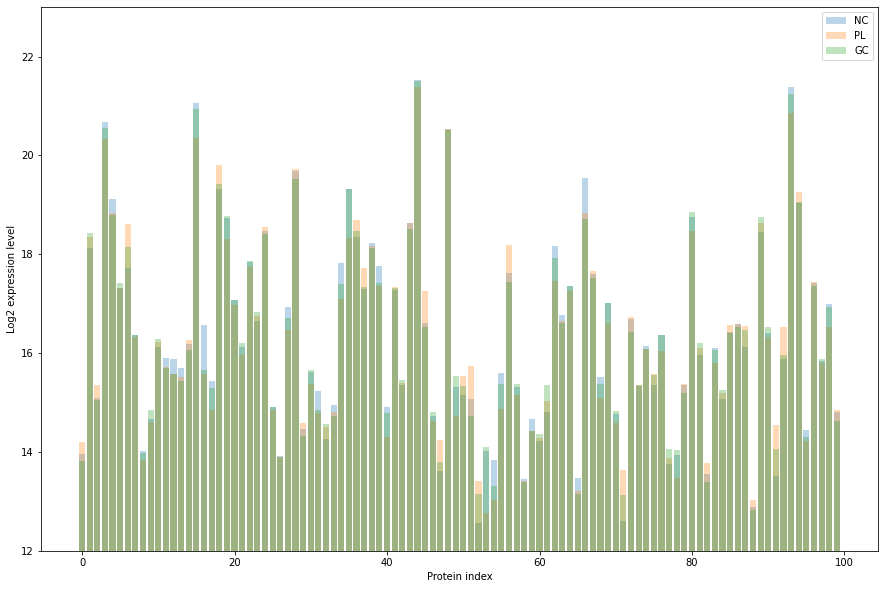

In [60]:
n = 100
xx = list(range(n))

fig = plt.figure(figsize=(15,10))
plt.bar(xx, avg_gastric_df['avg_NC_log2'][0:n], alpha=0.3);
plt.bar(xx, avg_gastric_df['avg_GC_log2'][0:n], alpha=0.3);
plt.bar(xx, avg_gastric_df['avg_PL_log2'][0:n], alpha=0.3);
plt.legend(['NC', 'PL', 'GC'], loc='best');
plt.ylim([12,23]);
plt.xlabel('Protein index')
plt.ylabel('Log2 expression level');

fig.savefig('figures/prelim_gastric.png')